## Introduction


In this notebook, we have mainly focused on analyzing **application_data.csv** i.e. data about current application of loan.


## Approach of Application Data Analysis

- Importing Module

- Reading the Dataset into Pandas Dataframe

- We have divided the features into small segments and anlyzed segment-wise using a smaller dataframe containing only relevant categories.

- Data Cleaning, Missing Data Handling, Type casting are done segment-wise.

- Plots and percentage wise Dafaulter calculation are done segment-wise as well.

### Importing the Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('ggplot')

### Reading the dataset

In [4]:
application_df = pd.read_csv("application_data.csv")
prev_ap_df = pd.read_csv("previous_application.csv")

In [5]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
print(application_df.shape)

print(prev_ap_df.shape)

(307511, 122)
(1670214, 37)


**Comment:**

- prev_ap_df contains 37 features and 1670214 rows
 
 (Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)
 
 
- application_df contains 121 features, 1 target variable, and 307511 rows

 (Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)


In [10]:
# Function_name : missingdata_percentage
# Usage : Returns % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and % of missing values in those categories

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [11]:
# Function_name : value_wise_defaulter_percentage
# Usage : Returns % of defaulters for every unique value of a column(Categorical)
# Arguments : dataframe, column
# Returns : a dataframe containing unique values of a caterory and % of defaulters

def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

### Checking Data Imbalance

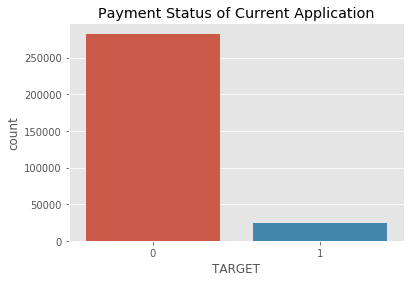

In [12]:
plt.title("Payment Status of Current Application")
sns.countplot(application_df['TARGET'])
plt.show()

### Data Imbalance Ratio

In [13]:
non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("No. of non-defaulters: ", non_default.shape[0])

No. of defaulters:  24825
No. of non-defaulters:  282686


In [14]:
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.072881945686495


**Comment:** This data is highly imbalanced as number of defaulter is very less in total population.
Data Imbalance Ratio

Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

### Segment 1: Documents Submitted by Applicant

Here we are analyzing 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' columns.
Our goal to understand whether trend of document submission and identify impact on TARGET variable(if any).

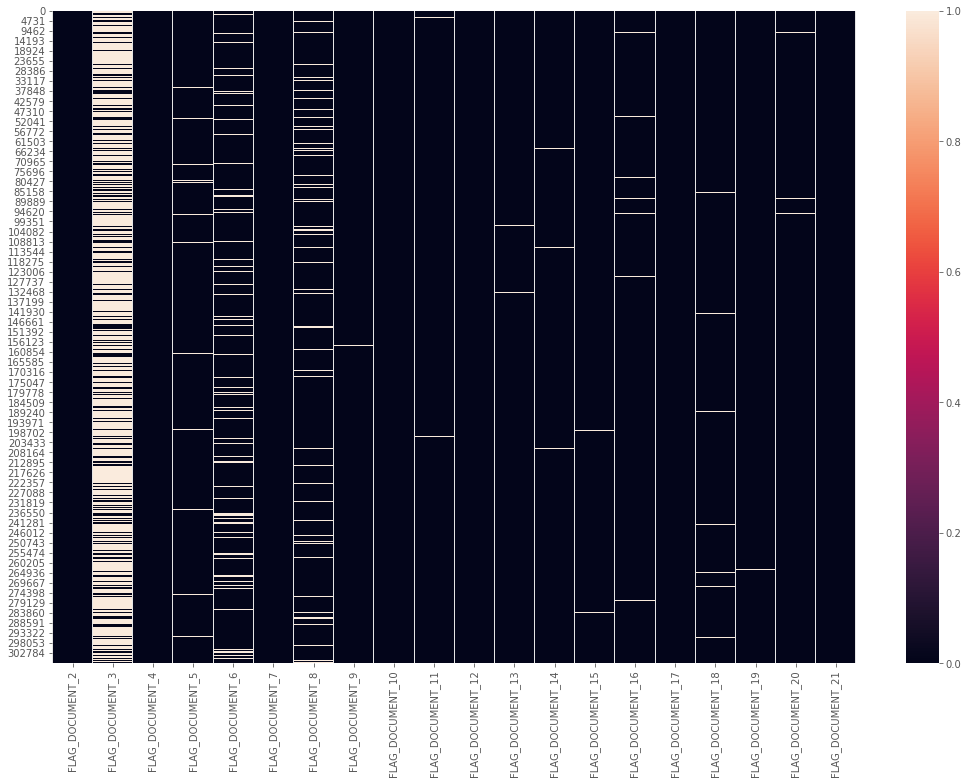

In [15]:
starting_idx = application_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,starting_idx:ending_idx])
plt.show()

**Comment:**
- The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
- Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

Checking both defaulter and non-defaulter entries to identify importance of Document 3

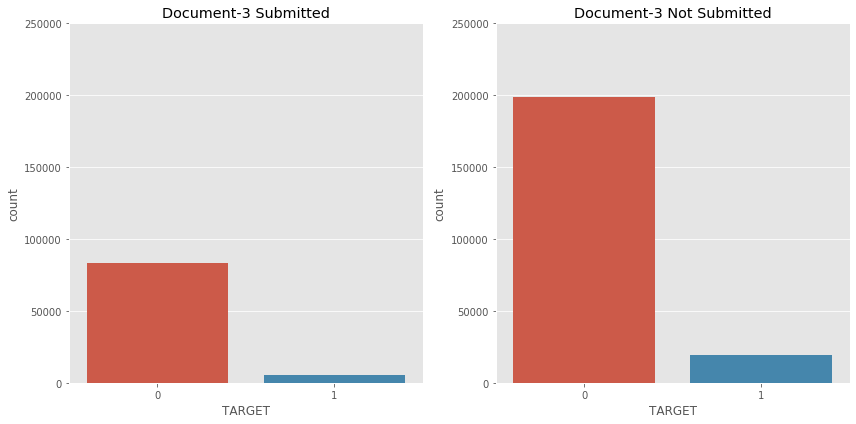

In [16]:
# Using equal ylim to for better visibilty

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Not Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()

**Comment:**
- FLAG_DOCUMENT_3 is showing similar trend for both non-defaulters and defaulters.
- Hence, this column can be dropped.

### Segment 2 : Housing Information of Applicant

In [17]:
starting_idx = application_df.columns.get_loc("APARTMENTS_AVG") 
ending_idx = application_df.columns.get_loc("EMERGENCYSTATE_MODE")

In [18]:
housing_df = application_df.iloc[:, starting_idx:ending_idx+1]
housing_df['TARGET'] = application_df["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_df["NAME_HOUSING_TYPE"]

In [19]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [20]:
housing_df_missing = missingdata_percentage(housing_df)

In [21]:
housing_df_missing.sort_values("percentage")

,category,percentage
46,EMERGENCYSTATE_MODE,47.398304
44,TOTALAREA_MODE,48.268517
2,YEARS_BEGINEXPLUATATION_AVG,48.781019
30,YEARS_BEGINEXPLUATATION_MEDI,48.781019
16,YEARS_BEGINEXPLUATATION_MODE,48.781019
35,FLOORSMAX_MEDI,49.760822
7,FLOORSMAX_AVG,49.760822
21,FLOORSMAX_MODE,49.760822
43,HOUSETYPE_MODE,50.176091
39,LIVINGAREA_MEDI,50.193326


**Comment**
- All of the features have very high (47-70%) missing data percentage. Hence all these features can be dropped.

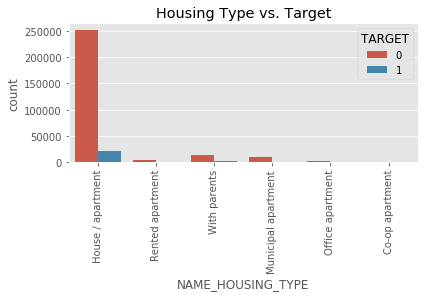

In [22]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [23]:
value_wise_defaulter_percentage(application_df, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


**Comment:**
- Most of the applicants live in House/Apartment
- Applicants living with their parents or in rented apartment have higher rate of default.

### Segment 3 :Social Circle Info

In [24]:
start_idx = application_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_df.iloc[:, start_idx:end_idx+1]

In [25]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [26]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


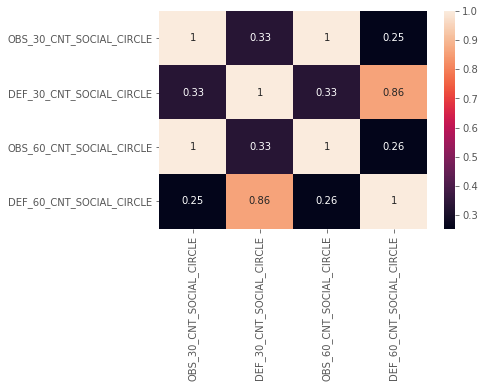

In [27]:
sns.heatmap(social_circle_df.corr(), annot=True)

**Comment:**
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

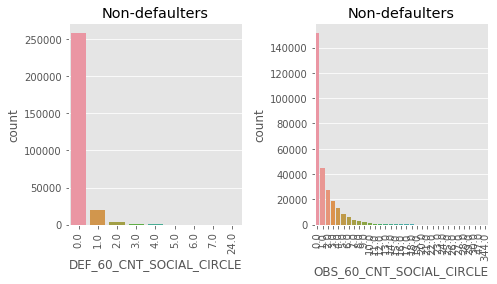

In [28]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=non_default)
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()


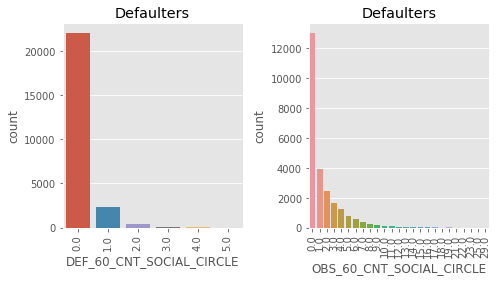

In [29]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=default)
    plt.title("Defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()


**Comment:**
- For defaulter and non-defaulter 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend.

### Segment 4 : Region related data

In [30]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:, start_idx:end_idx+1]

In [31]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']

In [32]:
region_df["TARGET"] = application_df["TARGET"]

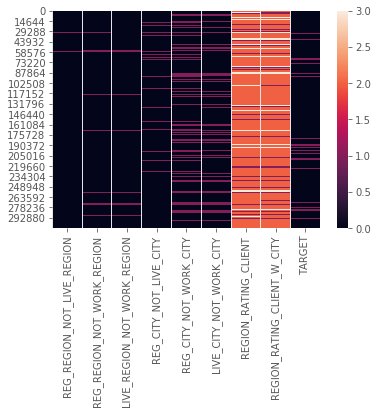

In [33]:
sns.heatmap(region_df)
plt.show()

**Comment:**
- All the features are labeled as 0 and 1
- REG_REGION_NOT_LIVE_REGION mostly contains 0, hence can be removed
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
- REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed

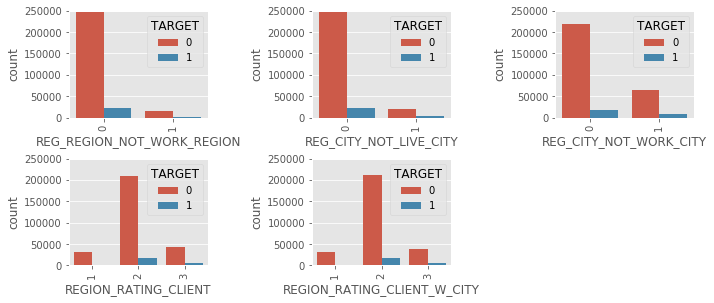

In [34]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()


**Comment:**
- Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
- Highest Applicants have Region rating of 2 

### Segment 5: Contact Related Info

In [35]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

In [36]:
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


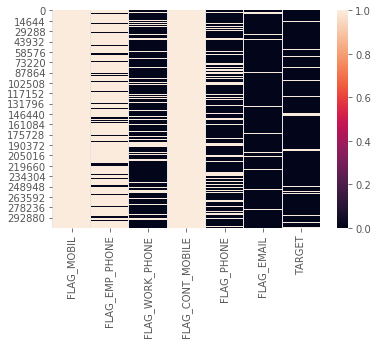

In [37]:
plt.figure()
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

**Comment:**
- All the features in contact_df are categorical (0 and 1)

- As there is no similarity of patterns of TARGET value with the features,
we are assuming the feature are not useful for analysis.

- Hence all of the features can be removed

### Segment 6: Asset Details

In [38]:
application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


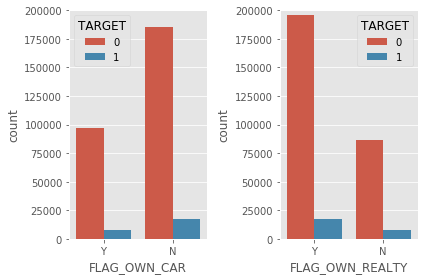

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_df['FLAG_OWN_CAR'], hue=application_df['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_df['FLAG_OWN_REALTY'], hue=application_df['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [40]:
value_wise_defaulter_percentage(application_df, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [41]:
value_wise_defaulter_percentage(application_df, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


**Comment:**
- Most of the applicants own realty
- Most of the applicants do not own cars
- People not owning reality and car and have a slightly higher default rate than the people who own reality and car

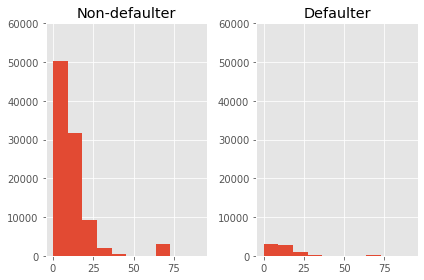

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

non_default['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
default['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()

**Comment:**
- Defaulter or not, most applicants have car age between 0-25 years.
- Since for both target value, trend is similar, this feature can dropped.

### Segment 7: Family Related Info

In [43]:
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [44]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS

application_df = application_df.dropna(subset=['CNT_FAM_MEMBERS']) 
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [45]:
# Since number of family member cannot have fraction, converting to Integer

application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)
application_df[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


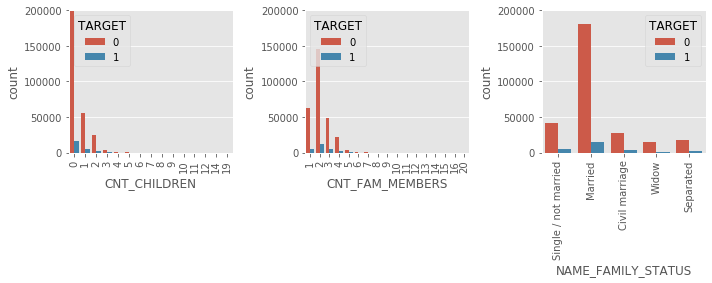

In [46]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()


In [47]:
value_wise_defaulter_percentage(application_df, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [48]:
value_wise_defaulter_percentage(application_df, 'CNT_CHILDREN')

,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [49]:
application_df.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [50]:
value_wise_defaulter_percentage(application_df, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [51]:
application_df.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

**Comment:**
- Default rate is highest for Civil Marriage and Single applicants
- Most of the applicants are married (and/or) no children (and/or) 2 family members.
- Applicants with relatively more number of children (and/or) family members have higher default percentage.

- For some of the cases where count children/family members is high, and the default rate is very high or very low.
 This cases cannot be taken as a conclusion as number of applicants having a large family is very low.

### Segment 8: Education and Occupation Info

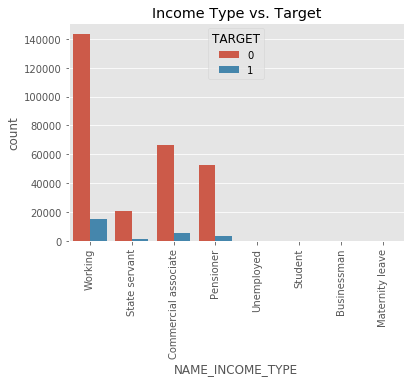

In [52]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [53]:
value_wise_defaulter_percentage(application_df,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [54]:
application_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Comment:**
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [55]:
value_wise_defaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


**Comment:**
- Applicants having "Lower secondary" education have highest percentage of Defaulter.

In [56]:
application_df['OCCUPATION_TYPE'].isnull().value_counts()

False    211118
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
application_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [58]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

application_df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [59]:
value_wise_defaulter_percentage(application_df, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


**Comment:**
- Low skilled labourers have very high rate of defaulters in comparison to other occupations

In [60]:
application_df['CODE_GENDER'].isnull().sum()

0

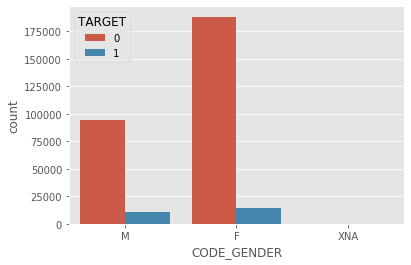

In [61]:
sns.countplot(application_df['CODE_GENDER'], hue=application_df["TARGET"])
plt.show()

**Comment:**
- Female applicants are more than male applicants
- Defaulter percentage is higher for male applicants

In [62]:
# Converting DAYS_BIRTH to age

application_df["Age"] = application_df.DAYS_BIRTH//(-365.25) 
application_df[["Age"]].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [63]:
# Dropping the column as new column will be used for analysis

application_df.drop("DAYS_BIRTH", inplace=True, axis=1)

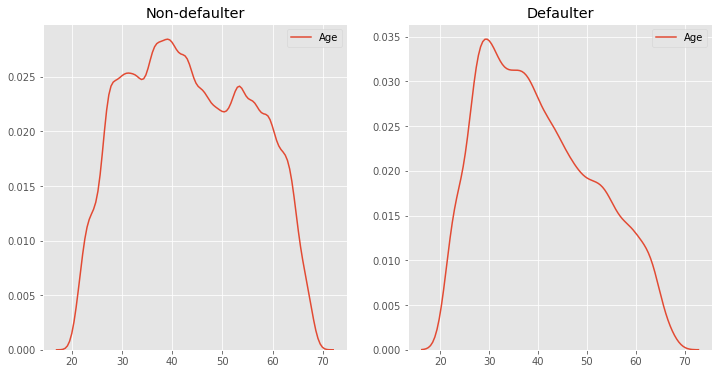

In [64]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

**Comment:**
- People of age 30 have higher default rate
- Default cases are less for applicants more than 40 years old.

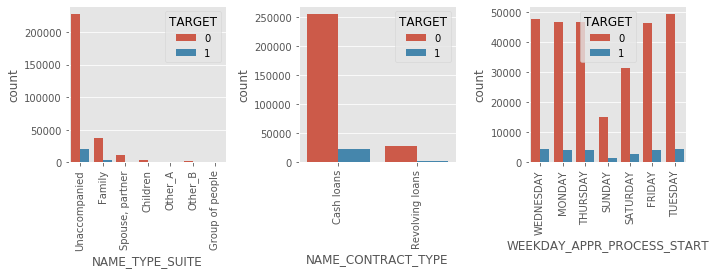

In [65]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()


**Comment:**
- Most of the applicants are unaccompanied while applying for loan
- Number Cash loans is quite higher than Revolving Loans
- All weekdays have similar number of applicants than weekend(Saturday and Sunday)

### Income and Annuity

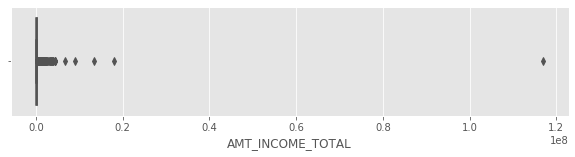

In [66]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()

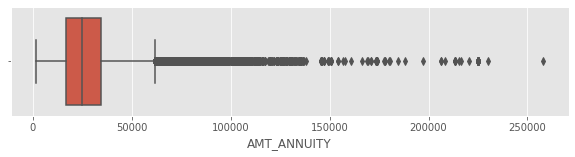

In [67]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [68]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_INCOMRE_TOTAL

application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]

In [69]:
application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'], 99)]


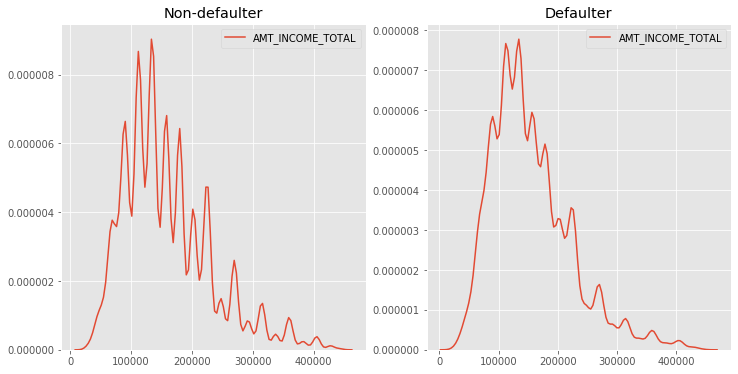

In [70]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

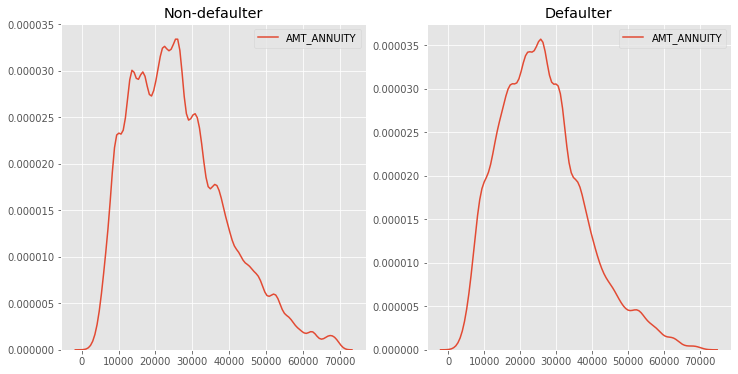

In [71]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

**Comment:**
- For Defaulters and non-defaulters AMT_ANNUITY distribution is similar.

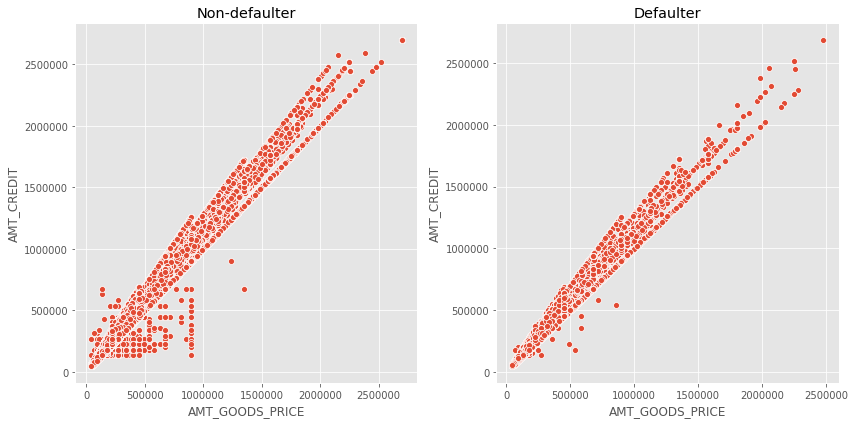

In [72]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(application_df[application_df["TARGET"] == 0]['AMT_GOODS_PRICE'], application_df[application_df["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(application_df[application_df["TARGET"] == 1]['AMT_GOODS_PRICE'], application_df[application_df["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

**Comment:**
- AMT_CREDIT and AMT_GOODS_PRICE have linear relation.
- For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters 

In [73]:
application_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  130064 non-null  float64
 1   EXT_SOURCE_2  298814 non-null  float64
 2   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(3)
memory usage: 9.1 MB


In [74]:
application_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_3
count,130064.000000,240038.000000,240038.000000
mean,0.499680,0.510843,0.510843
std,0.211062,0.194880,0.194880
min,0.014568,0.000527,0.000527
25%,0.331224,0.370650,0.370650
50%,0.502826,0.535276,0.535276
75%,0.672288,0.669057,0.669057
max,0.962693,0.896010,0.896010


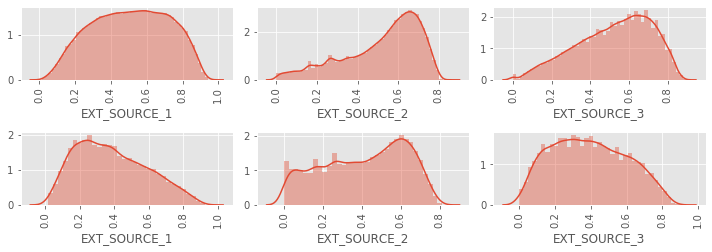

In [75]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 3:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_df[application_df["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Comment:**
- 'EXT_SOURCE_1' and 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters.

### Top 10 correlation for Defaulters

In [76]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [77]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998269
BASEMENTAREA_AVG            BASEMENTAREA_MEDI             0.998250
COMMONAREA_AVG              COMMONAREA_MEDI               0.998107
YEARS_BUILD_MEDI            YEARS_BUILD_AVG               0.998100
NONLIVINGAPARTMENTS_AVG     NONLIVINGAPARTMENTS_MEDI      0.998075
FLOORSMIN_AVG               FLOORSMIN_MEDI                0.997825
LIVINGAPARTMENTS_AVG        LIVINGAPARTMENTS_MEDI         0.997668
FLOORSMAX_MEDI              FLOORSMAX_AVG                 0.997187
NONLIVINGAPARTMENTS_MEDI    NONLIVINGAPARTMENTS_MODE      0.997032
ENTRANCES_MEDI              ENTRANCES_AVG                 0.996700
dtype: float64

### Top 10 Correlation for Non-defaulters

In [78]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [79]:
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
YEARS_BUILD_AVG             YEARS_BUILD_MEDI              0.998522
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998508
FLOORSMIN_MEDI              FLOORSMIN_AVG                 0.997202
FLOORSMAX_MEDI              FLOORSMAX_AVG                 0.997018
ENTRANCES_MEDI              ENTRANCES_AVG                 0.996899
ELEVATORS_AVG               ELEVATORS_MEDI                0.996161
COMMONAREA_MEDI             COMMONAREA_AVG                0.995857
LIVINGAREA_AVG              LIVINGAREA_MEDI               0.995568
APARTMENTS_AVG              APARTMENTS_MEDI               0.995163
BASEMENTAREA_MEDI           BASEMENTAREA_AVG              0.994081
dtype: float64

#### Top 10 Correlations for Defaulters

1. (OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)
2. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)
3. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
4. (COMMONAREA_MEDI, COMMONAREA_AVG)
5. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
6. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_AVG)
7. (LIVINGAPARTMENTS_MEDI, LIVINGAPARTMENTS_AVG)
8. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_MODE)
9. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
10. (ENTRANCES_AVG, ENTRANCES_MEDI)

#### Top 10 Correlations for Non-Defaulters

1. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
2. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
3. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
4. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
5. (ENTRANCES_AVG, ENTRANCES_MEDI)
6. (ELEVATORS_AVG, ELEVATORS_MEDI)
7. (COMMONAREA_MEDI, COMMONAREA_AVG)
8. (LIVINGAREA_AVG, LIVINGAREA_MEDI)
9. (APARTMENTS_MEDI, APARTMENTS_AVG)
10. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)

### Top 5 important columns

-Family Info: (Important driving features : **'CNT_FAM_MEMBERS', 'CNT_CHILDREN'**)
i. Most of the applicants are married (and/or) no children (and/or) 2 family members.
ii. Applicants with relatively more number of children (and/or) family members have higher default percentage.
(For some of the cases where count children/family members is high, and the default rate is very high or very low.
This cases cannot be considered for analysis as number of applicants having a large family is very low.)

- Education and Occupation Info: (Important driving features :**'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'**)
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

**CODE_GENDER**
- Female applicants are more than male applicants
- Defauter percentage is higher for male applicants
- XNA values can be replaced with "Unknown"

**DAYS_BIRTH**
- A derived column 'Age' from this gave useful information.
- People of age 25-35 have higher default rate
- Default cases are less for applicants more than 40 years old.

**'EXT_SOURCE_1' and 'EXT_SOURCE_3'** have very different distribution for defaulters and non-defaulters. This can be important features.

## Summary :

1. This data is highly imbalanced as number of defaulter is very less in total population.

'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, 'EXT_SOURCE_1' and 'EXT_SOURCE_3' 
are some of the important driving factors.

2. Documents : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment.
Majority of the applicants did not submit any documents apart from DOCUMENT_3.
FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.

3. Housing: All of the features considered have very high (47-70%) missing data percentage. Hence all these features can be dropped. Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that

i. Most of the applicants live in House/Apartment
ii. Applicants living with their parents or in rented apartment have higher rate of default. 

4. Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

5. Regional Info: Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same

6. Contact Info : Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.

7. Asset Info : 
i. Most of the applicants own realty
ii. Most of the applicants do not own cars
iii. People not owning reality and car and have a slightly higher default rate than the people who own reality and car
